<a href="https://colab.research.google.com/github/mickeykubo/dash/blob/master/fastai_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Google Colab を用いた fast.ai による深層学習


まずはインストールを行う．

1. 上部メニューのランタイム/ランタイプの種類を変更でGPUをオンにする．
2. GPUにあったPyTorchをpipで入れる．
3. torchvisionを入れる．
4. fastaiを入れる．
5. 画像モジュールにバグがあｒので，Pillowをダウングレードする．

In [5]:
!pip3 install https://download.pytorch.org/whl/cu80/torch-1.0.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
!pip3 install fastai
!pip3 install Pillow==4.0.0

  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0


fastaiのユーティリティでインストールの状態を確認しておく．

また環境の改善点を示唆してもらっておく．

Pillowについて文句を言っているようだが，バグがあるうちは仕方ない．

In [0]:
 from fastai.utils.collect_env import *
 show_install(True)



```text
=== Software === 
python        : 3.6.7
fastai        : 1.0.39
fastprogress  : 0.1.18
torch         : 1.0.0
nvidia driver : 396.44
torch cuda    : 8.0.61 / is available
torch cudnn   : 7102 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.14.65+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Sun Sep 9 02:18:33 PDT 2018
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython

Sat Dec 29 19:13:58 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------

In [0]:
check_perf()

Running performance checks.

*** libjpeg-turbo status
❓ libjpeg-turbo's status can't be derived - need Pillow(-SIMD)? >= 5.4.0 to tell, current version 4.0.0
5.4.0 is not yet available, other than the dev version on github, which can be installed via pip from git+https://github.com/python-pillow/Pillow. See https://docs.fast.ai/performance.html#libjpeg-turbo

*** Pillow-SIMD status
✘ Running Pillow 4.0.0; It's recommended you install Pillow-SIMD to speed up image resizing and other operations. See https://docs.fast.ai/performance.html#pillow-simd

*** CUDA status
✘ You are running pytorch built against cuda 8.0.61, your NVIDIA driver 396.44 supports cuda10. See https://pytorch.org/get-started/locally/ to install pytorch built against the faster CUDA version.

Refer to https://docs.fast.ai/performance.html to make sense out of these checks and suggestions.


# 訓練モジュール






---



---




In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
data = ImageDataBunch.from_folder(path)
#data = ImageDataBunch.from_folder(path, train='training', valid='testing', size=12)

In [0]:
model = simple_cnn((3,16,16,2))

In [0]:
learn = Learner(data,model,metrics=[accuracy])

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


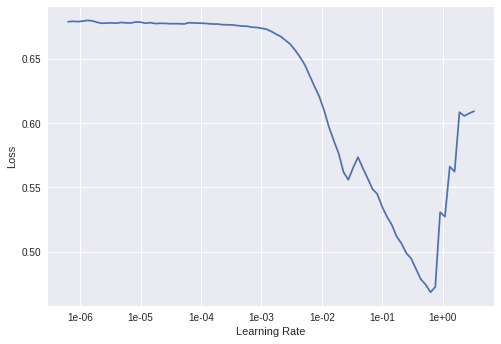

In [0]:
learn.recorder.plot()

In [0]:
learn.fit(1,1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.102187,0.070648,0.976448


In [0]:
learn.fit_one_cycle(3,max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.012822,0.016898,0.994603
2,0.009314,0.017104,0.994112
3,0.005167,0.012586,0.995584


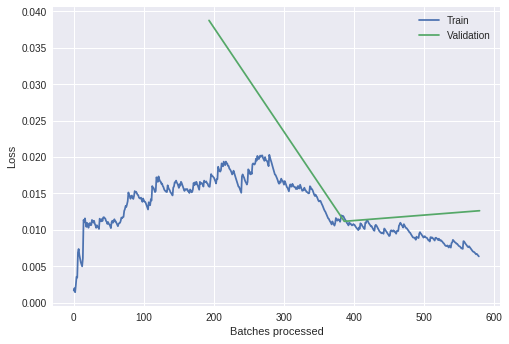

In [0]:
learn.recorder.plot_losses()

損出関数の値と予測値を得るには，get_predsメソッドを用いる．

元のデータと予測値，正解（y），損出関数の値を引数として， ClassificationInterpretation()クラスのインスタンスを生成する．

plot_top_lossesを用いると，損出関数が悪かったデータを描画してくれる．

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)

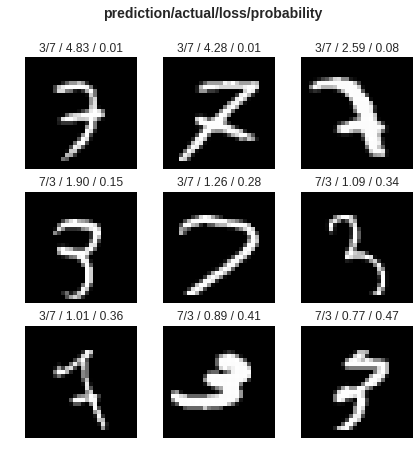

In [0]:
interp.plot_top_losses(9, figsize=(7,7))

正解と外れを表す表（混合行列とよばれる）を出力するには，polt_confusion_matrixを使う．

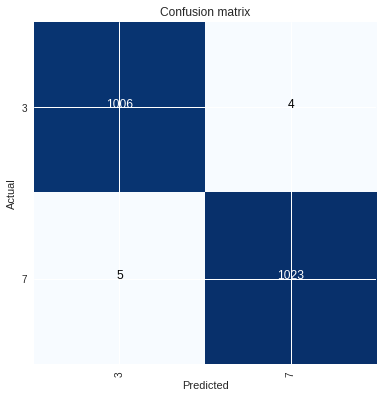

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.172892,0.109038,0.966634


In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


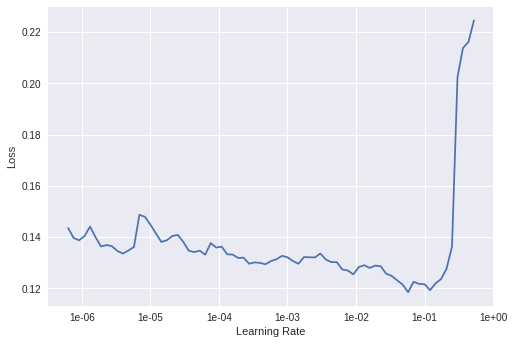

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1,max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.028815,0.012960,0.994112


In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1,max_lr=(1e-4,1e-3,1e-2) )

epoch,train_loss,valid_loss,accuracy
1,0.017575,0.000768,1.000000


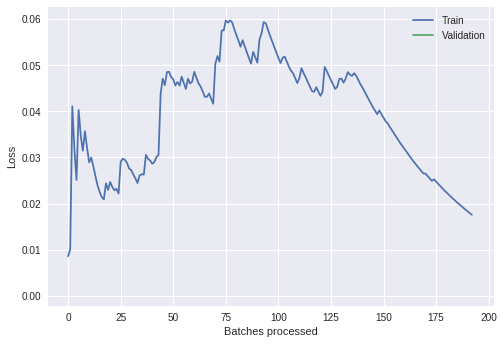

In [0]:
learn.recorder.plot_losses()

損出関数の値が悪かった9つのデータを表示して，混合行列を出力する．

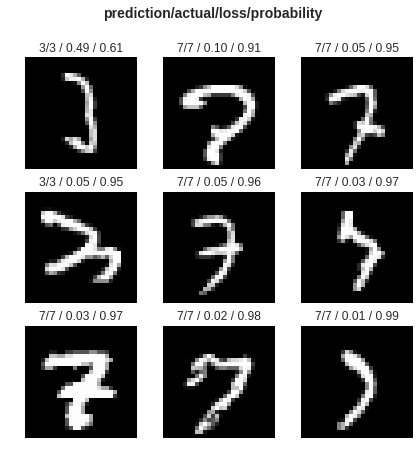

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))

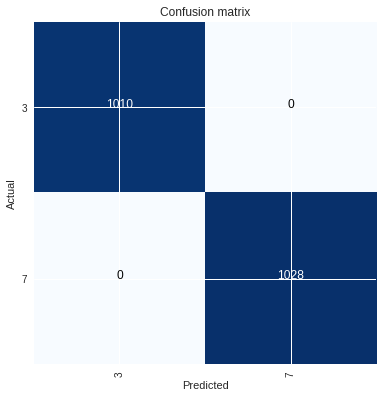

In [0]:
interp.plot_confusion_matrix()

# Cifar10の訓練



In [7]:
path = untar_data(URLs.CIFAR)
path

PosixPath('/root/.fastai/data/cifar10')

In [0]:
data = ImageDataBunch.from_folder(path, valid='test', size=24)

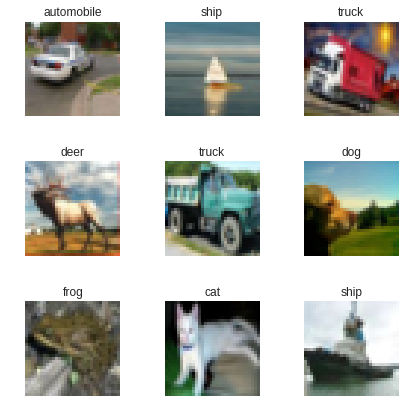

In [9]:
data.normalize()
data.show_batch(rows=3, figsize=(6,6))

In [10]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 70420209.93it/s]


In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


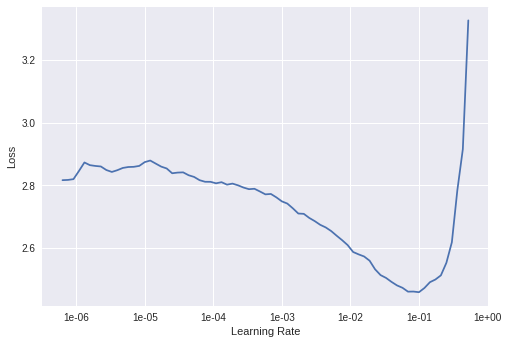

In [0]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(30,max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy
1,1.148117,1.029830,0.649600
2,0.851647,0.755063,0.740100
3,0.749232,0.673972,0.762200
4,0.724774,0.703464,0.754900
5,0.748079,0.723148,0.753400
6,0.712955,0.708213,0.761200
7,0.702921,0.735429,0.752200
8,0.696681,0.707383,0.754300
9,0.675747,0.744464,0.758700
10,0.640287,0.622290,0.783600


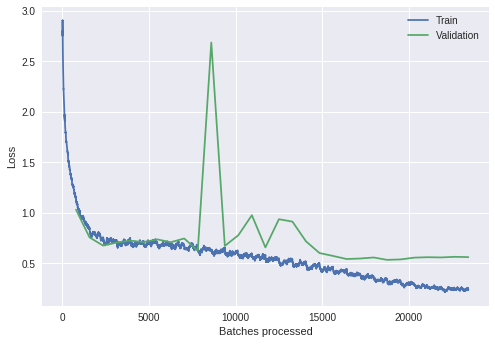

In [12]:
learn.recorder.plot_losses()

In [13]:
learn.unfreeze()
learn.fit_one_cycle(10,max_lr=1e-3 )

epoch,train_loss,valid_loss,accuracy
1,0.670650,0.816063,0.775900
2,0.716890,0.813482,0.726200
3,0.682341,2.258594,0.755300
4,0.585148,0.616984,0.783200
5,0.459744,0.705320,0.794800
6,0.339118,0.493663,0.834100
7,0.237527,0.482337,0.847100
8,0.099128,0.550763,0.848400
9,0.039901,0.573271,0.855700
10,0.022271,0.568604,0.858700


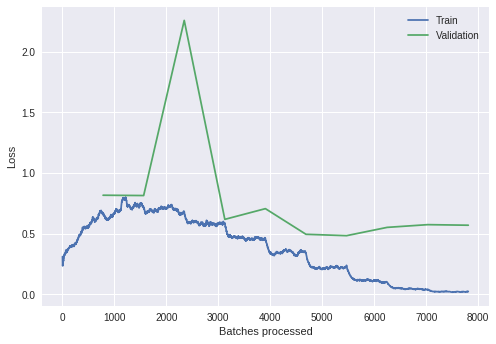

In [15]:
learn.recorder.plot_losses()

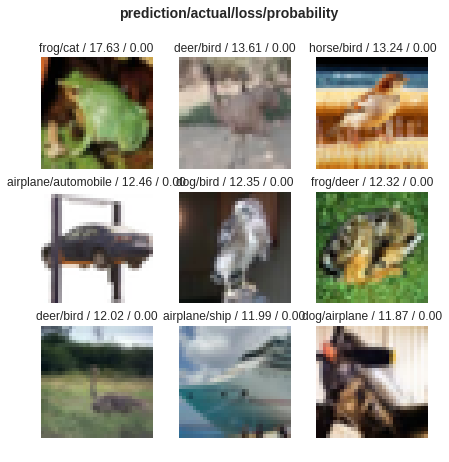

In [16]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))

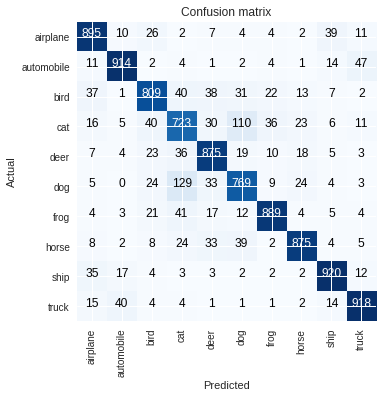

In [17]:
interp.plot_confusion_matrix()

# 表形式データの学習


In [0]:
from fastai import *

In [0]:
from fastai.tabular import * 

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)

In [0]:
df = pd.read_csv(path/'adult.csv')

In [0]:
procs = [FillMissing, Categorify, Normalize] #前処理の種類を準備．
valid_idx = range(len(df)-2000, len(df)) #検証用データのインデックスを準備．
dep_var = '>=50k' #従属変数名とカテゴリー変数が格納されている列リストを準備．
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [0]:
# DataBunchのインスタンスdataを生成．
data = TabularDataBunch.from_df(path, df, dep_var, 
valid_idx=valid_idx, procs=procs, cat_names=cat_names)

In [0]:
#深層学習(PyTorch)の学習器インスタンスlearnを生成し，fitメソッドで訓練．引数はエポック数と学習率．
learn = tabular_learner(data, layers=[200,100], emb_szs={'native-country': 10}, metrics=accuracy)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.338148,0.316442,0.853000


# 画像データの例

In [0]:
from fastai.vision import *

In [0]:
path = untar_data(URLs.CIFAR)
data = ImageDataBunch.from_folder(path)

In [0]:
#learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn = create_cnn(data, models.resnet18, metrics=accuracy, callback_fns=ShowGraph)
learn.fit(1)

# 協調フィルタリングの例

In [0]:
from fastai.collab import * 

In [0]:
path = untar_data(URLs.ML_SAMPLE)
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
data = CollabDataBunch.from_df(ratings)

In [0]:
learn = collab_learner(data, n_factors=50, y_range=(0.,5.))

In [0]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss
1,2.443485,2.030991
2,1.125733,0.664717
3,0.750798,0.635108
4,0.633702,0.631200
5,0.574826,0.627643
